In [207]:
import pandas as pd
import numpy as np

import pickle
import glob
from gensim.models.ldamulticore import LdaMulticore,LdaModel
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import common_corpus, common_dictionary

In [209]:
path = '/home/sdeng/data/icews/corpus/THA_doc_tokens_from_2010.txt'
# path = '/home/sdeng/data/icews/corpus/EGY_doc_tokens_from_2010.txt'

with open(path,'r') as f:
    corpus = f.read().splitlines()

In [292]:
# len(corpus),corpus[-1]
corpus_tokenized[0]

['crime',
 'track',
 'street',
 'crime',
 'cybercrime',
 'online',
 'fraud',
 'cybercrime',
 'expected',
 'grow',
 'bangkok',
 'metropolitan',
 'police',
 'target',
 'loan',
 'shark',
 'gang',
 'criminal',
 'independently',
 'street',
 'crime',
 'rate',
 'dropped',
 'cyber',
 'crime',
 'metropolitan',
 'police',
 'bureau',
 'mpb',
 'mpb',
 'worried',
 'internet-based',
 'crime',
 'rise',
 'online',
 'fraud',
 'rate',
 'street',
 'crime',
 'theft',
 'robbery',
 'car',
 'break-in',
 'fallen',
 'sharply',
 'metropolitan',
 'police',
 'bureau',
 'commissioner',
 'pol',
 'gen',
 'sanit',
 'mahathavorn',
 'adding',
 'stolen',
 'car',
 'motorcycle',
 'bangkok',
 'dropped',
 'success',
 'stepped-up',
 'measure',
 'mpb',
 'increased',
 'police',
 'patrol',
 'told',
 'patrol',
 'officer',
 'talk',
 'people',
 'community',
 'precaution',
 'protect',
 'crime',
 'result',
 'street',
 'crime',
 'downtown',
 'cyber',
 'crime',
 'hand',
 'rise',
 'continuing',
 'trend',
 'observed',
 'month',
 'mpb',


In [211]:
corpus_tokenized = []
for text in corpus:
    corpus_tokenized.append(text.split(' '))

In [212]:
corpus_dictionary = Dictionary(corpus_tokenized)
 

In [286]:
# corpus_tokenized[0]
len(corpus_corpus[3])

104

In [278]:
corpus_dictionary

In [275]:
# corpus_dictionary.save('topic-analysis/THA.dict')
loaded_dict = corpora.Dictionary.load('topic-analysis/THA.dict')
loaded_dict

In [213]:
corpus_corpus = [corpus_dictionary.doc2bow(text) for text in corpus_tokenized]


In [214]:
# corpus_corpus[2]
lda = LdaModel(corpus_corpus, num_topics=50)

In [276]:
# topics[-1]
# lda.save('topic-analysis/THA-50-LDA-default.model')
from gensim import corpora, models, similarities

# load('topic-analysis/THA-50-LDA-default.model')
model =  models.LdaModel.load('topic-analysis/THA-50-LDA-default.model')
# dict_model = corpora.Dictionary.load('topic-analysis/THA-50-LDA-default.model')


In [280]:
for t in model.get_topic_terms(1):
    print(loaded_dict[int(t[0])])
# model.get_topic_terms(1)
# dict_model.keys()
# dict_model.id2word(2)
# dict_model,model

murder
police
woman
body
family
wife
victim
killing
girl
death


In [308]:
# model[common_dictionary.doc2bow(['yinglucks','corruption','rice'])]

model[corpus_corpus[3]]
# model.get_topic_terms[0]
model.get_document_topics(corpus_corpus[:3],minimum_probability=0.01)[0]
# TODO for each day.   t-7-->t,(feature in the past, multi-hop encoding, dimension 50)   t(a topic at this day)--> t+1-->t+7 (if the 20 types of events)

[(2, 0.15852374),
 (10, 0.010027802),
 (16, 0.013086307),
 (17, 0.48295993),
 (19, 0.010367459),
 (25, 0.086261764),
 (29, 0.012094348),
 (36, 0.07955576),
 (40, 0.0833691),
 (43, 0.013522774),
 (46, 0.03216384)]

In [311]:
# corpus_corpus[3]
model.get_topic_terms(49)

[(1446, 0.08625887),
 (17804, 0.05721913),
 (1590, 0.03749164),
 (1453, 0.032860085),
 (305, 0.023329636),
 (17802, 0.021059899),
 (2382, 0.01770662),
 (100, 0.016234057),
 (2667, 0.014995959),
 (2378, 0.011270544)]

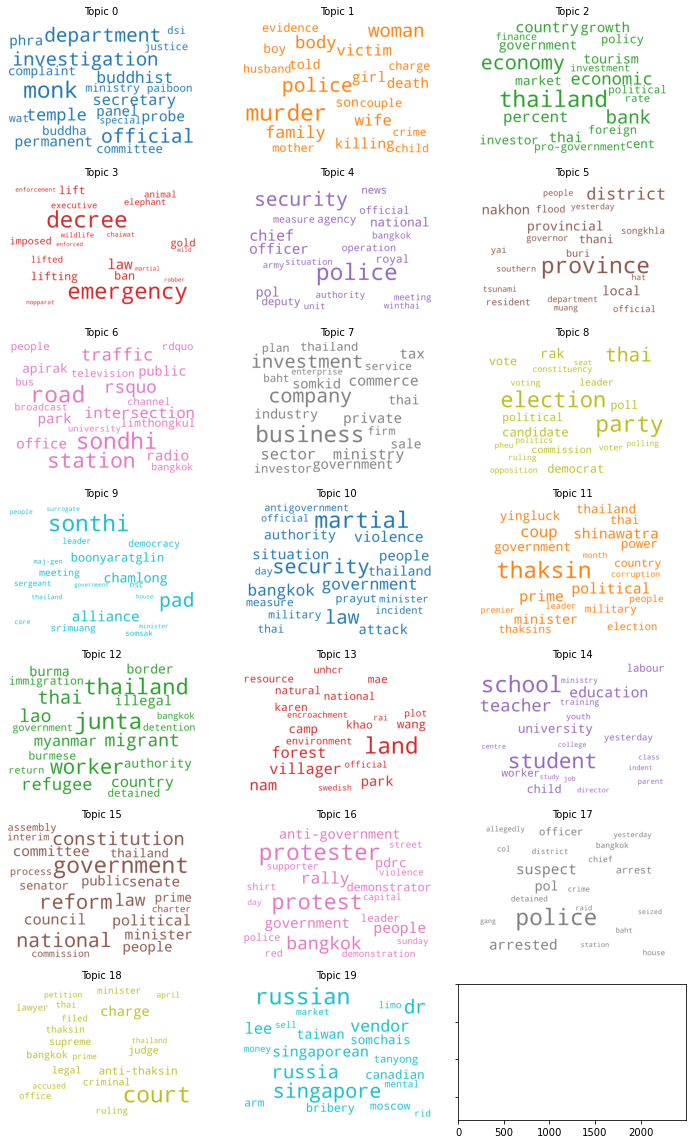

In [227]:
###############
# topics = lda.show_topics(num_topics=50,num_words=20,formatted=False)

# for i  in range(50):
#     topic_words = dict(topics[i][1])
#     topic_words_term = {}
#     topic_words_term_list = []
#     for k in topic_words:
# #         topic_words_term[corpus_dictionary[int(k)]] = topic_words[k]
#         topic_words_term_list.append(corpus_dictionary[int(k)])
#     print(i,topic_words_term_list)


from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
lda_model = lda
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols + cols
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# topics = lda_model.show_topics(num_topics=50,num_words=20,formatted=False)

fig, axes = plt.subplots(7, 3, figsize=(10,16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i >= 20:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
#     print((topic_words))
    topic_words_term = {}
    for k in topic_words:
        topic_words_term[corpus_dictionary[int(k)]] = topic_words[k]
#     print(topic_words_term)
    cloud.generate_from_frequencies(topic_words_term, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=10))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig("topic-analysis/THA-wordcloud-50-1.pdf", bbox_inches='tight', dpi=300, transparent=True)
plt.show()

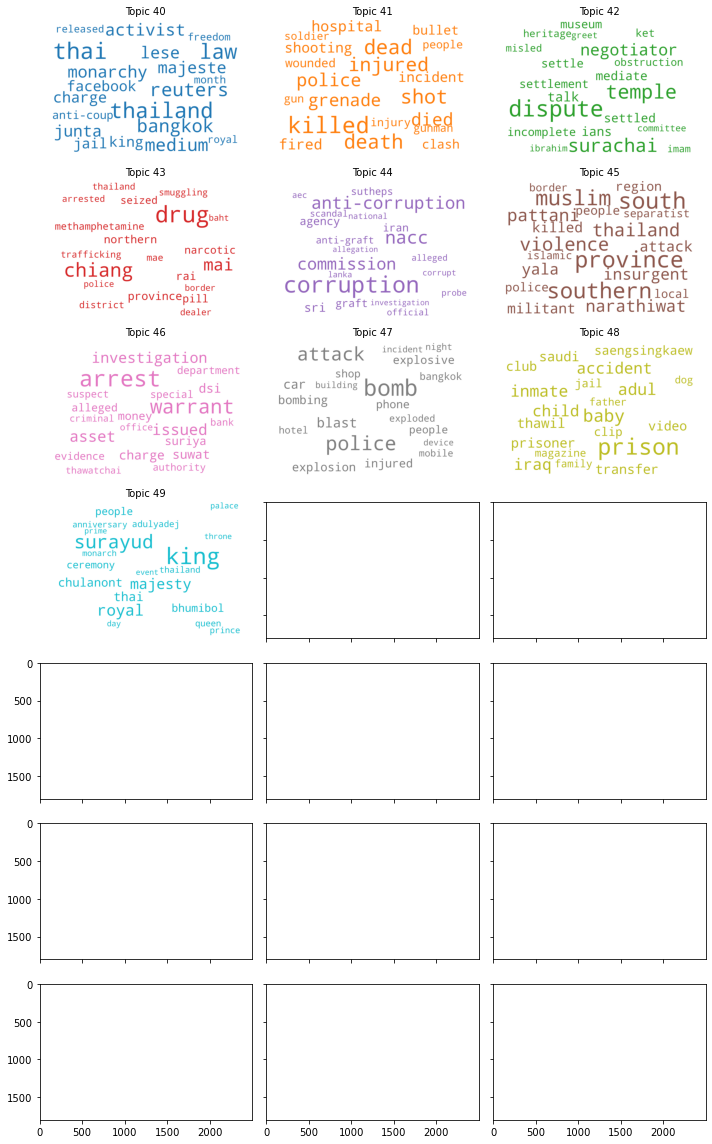

In [229]:
###############
# topics = lda.show_topics(num_topics=50,num_words=20,formatted=False)

# for i  in range(50):
#     topic_words = dict(topics[i][1])
#     topic_words_term = {}
#     topic_words_term_list = []
#     for k in topic_words:
# #         topic_words_term[corpus_dictionary[int(k)]] = topic_words[k]
#         topic_words_term_list.append(corpus_dictionary[int(k)])
#     print(i,topic_words_term_list)


from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
lda_model = lda
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols + cols
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

# topics = lda_model.show_topics(num_topics=50,num_words=20,formatted=False)

fig, axes = plt.subplots(7, 3, figsize=(10,16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i >= 10:
        break
    j = i+40
    fig.add_subplot(ax)
    topic_words = dict(topics[j][1])
#     print((topic_words))
    topic_words_term = {}
    for k in topic_words:
        topic_words_term[corpus_dictionary[int(k)]] = topic_words[k]
#     print(topic_words_term)
    cloud.generate_from_frequencies(topic_words_term, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(j), fontdict=dict(size=10))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig("topic-analysis/THA-wordcloud-50-3.pdf", bbox_inches='tight', dpi=300, transparent=True)
plt.show()

In [26]:
word_id = corpus_dictionary.doc2idx(['pm','minister'])

In [61]:
lda.get_term_topics(word_id[1])
topic_word_idx_list = lda.show_topics(num_topics=20,num_words=15,formatted=False)

In [62]:
# my_dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}


In [63]:
# print(my_dict)
# corpus_dictionary[756]
topic_word_idx_list 
for topic,l in topic_word_idx_list:
    print(topic,len(l),l,)
    for (w,s) in l:
        print(w,s,corpus_dictionary[int(w)])
#         break
#     words = [corpus_dictionary[w] for (w,s) in l]
#     print(words)
#     for w in l:
        

0 15 [('756', 0.049498804), ('1583', 0.0405244), ('57', 0.034504253), ('852', 0.027725324), ('1116', 0.023959411), ('893', 0.022344727), ('253', 0.017854853), ('16514', 0.014682202), ('394', 0.013232), ('343', 0.013178968), ('452', 0.012482114), ('2447', 0.012259421), ('830', 0.011848289), ('26', 0.011721226), ('236', 0.010284046)]
756 0.049498804 army
1583 0.0405244 military
57 0.034504253 gen
852 0.027725324 chief
1116 0.023959411 council
893 0.022344727 prayuth
253 0.017854853 national
16514 0.014682202 martial
394 0.013232 security
343 0.013178968 force
452 0.012482114 minister
2447 0.012259421 coup
830 0.011848289 prayut
26 0.011721226 commander
236 0.010284046 law
1 15 [('1987', 0.048510607), ('1820', 0.048496917), ('305', 0.038978275), ('452', 0.016613757), ('2004', 0.016476411), ('212', 0.013978903), ('7947', 0.013324331), ('463', 0.012741098), ('1978', 0.012131339), ('628', 0.011870363), ('2087', 0.011856413), ('379', 0.011051172), ('3160', 0.010068801), ('2005', 0.009928046),

<Figure size 432x288 with 0 Axes>

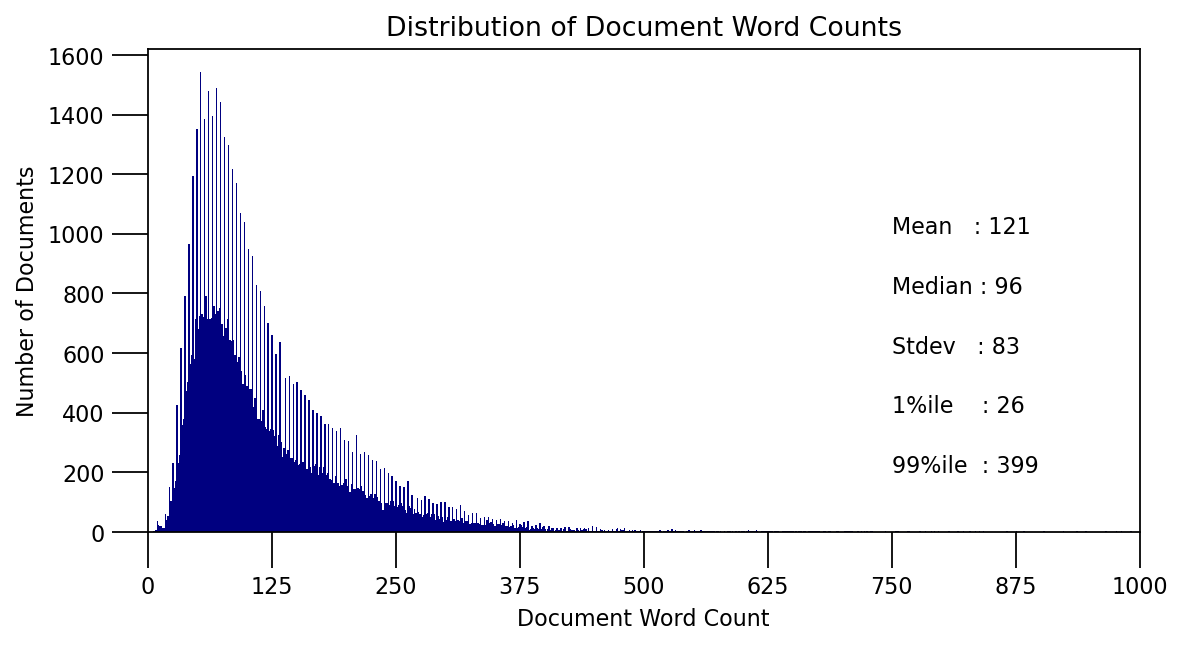

In [187]:
doc_lens = [len(d) for d in corpus_corpus]
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()
# Plot
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=160)

# plt.figure(figsize=(8,4), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 1000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 800, "Median : " + str(round(np.median(doc_lens))))
plt.text(750, 600, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750, 400, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750, 200, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=12))
fig.savefig("topic-analysis/EGY-doc-word-counts.pdf", bbox_inches='tight', dpi=300, transparent=True)
plt.show()

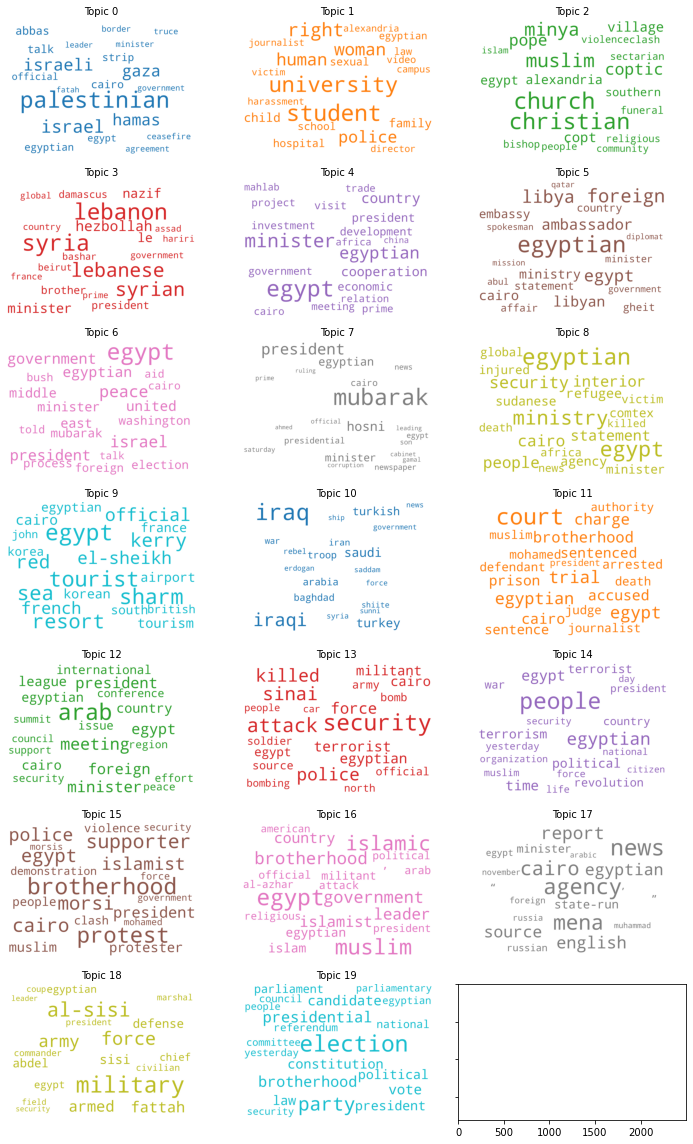

In [188]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
lda_model = lda
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols + cols
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_topics=20,num_words=20,formatted=False)

fig, axes = plt.subplots(7, 3, figsize=(10,16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i >= 20:
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
#     print((topic_words))
    topic_words_term = {}
    for k in topic_words:
        topic_words_term[corpus_dictionary[int(k)]] = topic_words[k]
#     print(topic_words_term)
    cloud.generate_from_frequencies(topic_words_term, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=10))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig("topic-analysis/EGY-wordcloud.pdf", bbox_inches='tight', dpi=300,
        transparent=True)
plt.show()

25343
43744
4801
10034
4841
3235
2119
1300
597
273
377
200
227
253
258
108
5
38
0
13
0


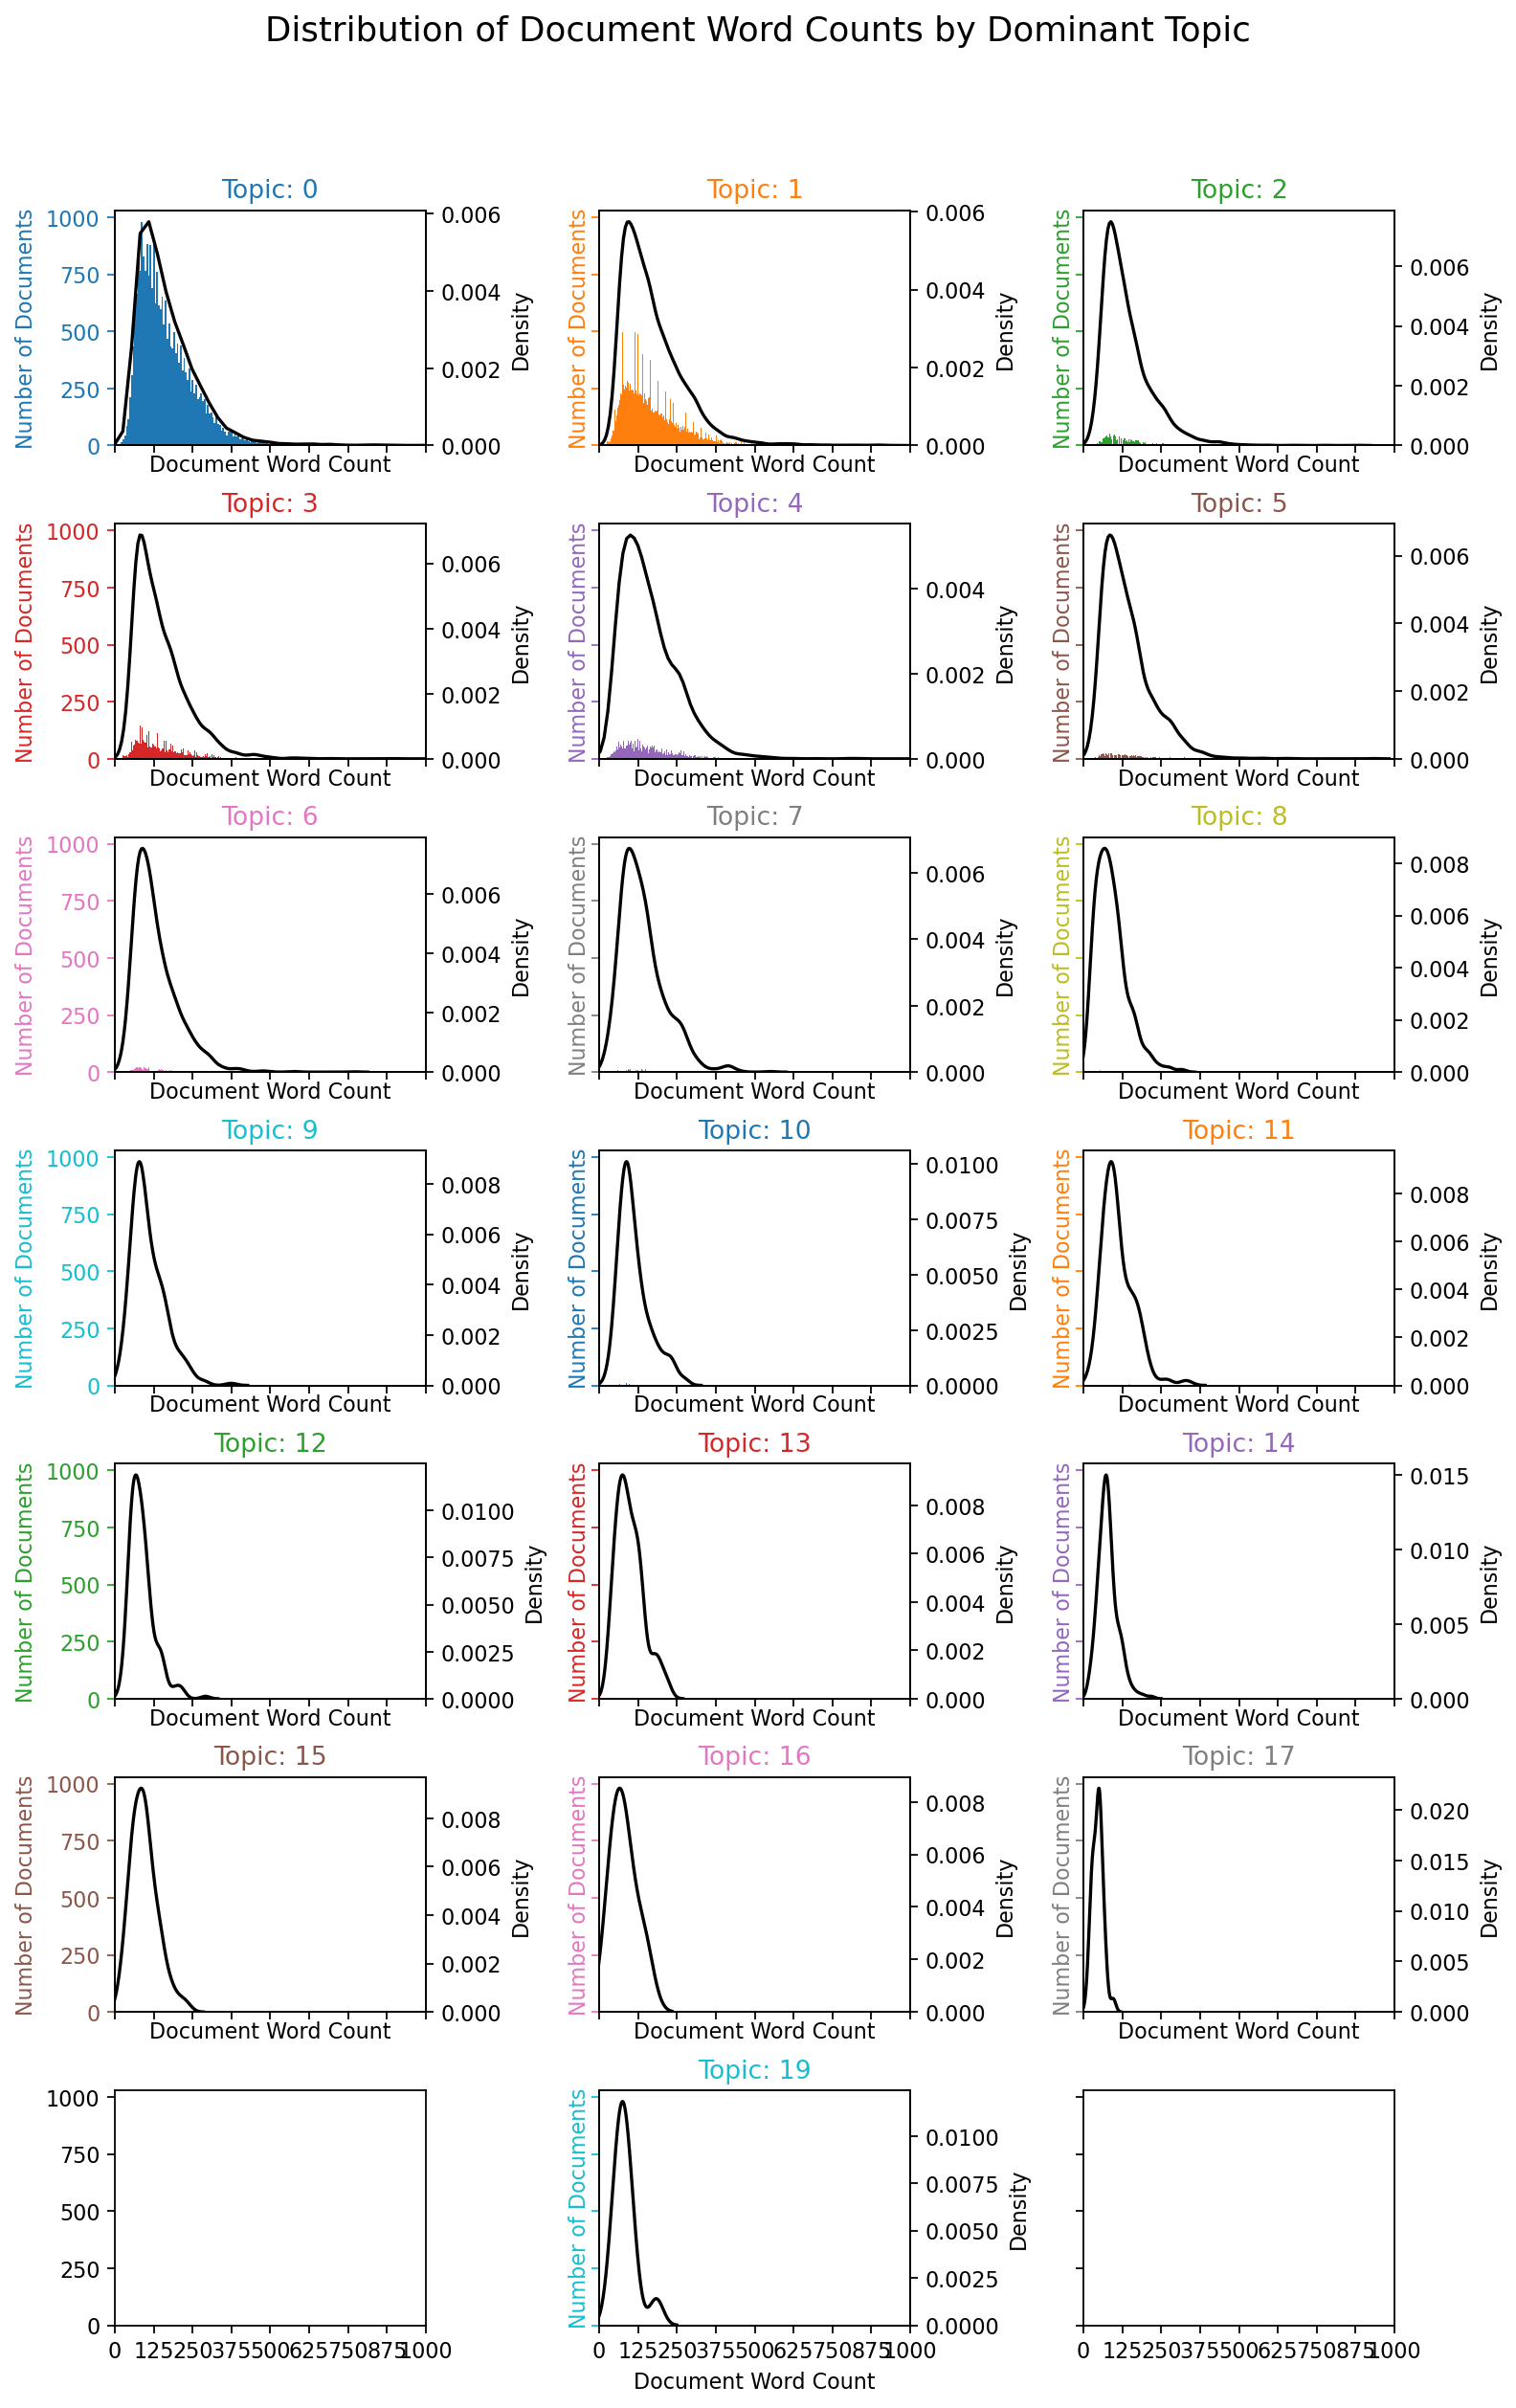

In [191]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols + cols
fig, axes = plt.subplots(7,3,figsize=(10,16), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic = df_topic.loc[df_topic.topic == i, :]
    print(len(df_dominant_topic))
    if len(df_dominant_topic) > 0:
        doc_lens = [len(d) for d in df_dominant_topic.tokens]
        ax.hist(doc_lens, bins = 1000, color=cols[i])
        ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
        sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
        ax.set(xlim=(0, 1000), xlabel='Document Word Count')
        ax.set_ylabel('Number of Documents', color=cols[i])
        ax.set_title('Topic: '+str(i), fontdict=dict(size=12, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=16)
fig.savefig("topic-analysis/EGY-dominant-topic.pdf", bbox_inches='tight', dpi=300,
        transparent=True)
plt.show()

In [248]:
# get topics of each doc
len(corpus_tokenized),corpus_tokenized[0]
doc_main_topic = {}
main_topic = []
for i in range(len(corpus_tokenized)):
    tmp = corpus_dictionary.doc2bow(corpus_tokenized[i])
    r = lda.get_document_topics(tmp)[0][0]
    main_topic.append(r)
    if i%10000 == 0:
        print(i)
#     try:
#     doc_main_topic[r] = doc_main_topic.get(r,0) + 1
#     except:
#         print(r)
#     print(r[0][0])
#     break

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [249]:
doc_main_topic
# len(main_topic)
d = {'tokens': corpus_tokenized, 'topic': main_topic}
df_topic = pd.DataFrame(data=d)

In [166]:
df_topic

,tokens,topic
0,"[crime, track, street, crime, cybercrime, onli...",4
1,"[crime, track, street, crime, cybercrime, onli...",4
2,"[illegal, fishing, trawler, thai, crew, boat, ...",2
3,"[cop, held, video, rohingya, abuse, myanmar, b...",3
4,"[malaysia, collaborates, thailand, monitor, fl...",0
...,...,...
97761,"[crime, centre, aid, victim, thai, justice, go...",0
97762,"[road, death, day, ’, “, dangerous, day, ”, ba...",0
97763,"[myanmar, suu, kyi, party, undecided, contesti...",1
97764,"[thai, couple, indicted, murder, japanese, ban...",4


In [143]:
from collections import Counter
topics = lda.show_topics(formatted=False)
data_flat = [w for w_list in corpus_tokenized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        word = corpus_dictionary[int(word)]
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


In [154]:
df['topic_id'].value_counts()
df.loc[df.topic_id==1, :]['word'].values

array(['minister', 'prime', 'government', 'thai', 'thailand', 'gen',
       'thaksin', 'military', 'council', 'country'], dtype=object)

/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/sdeng/anaconda2/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/sdeng/anac

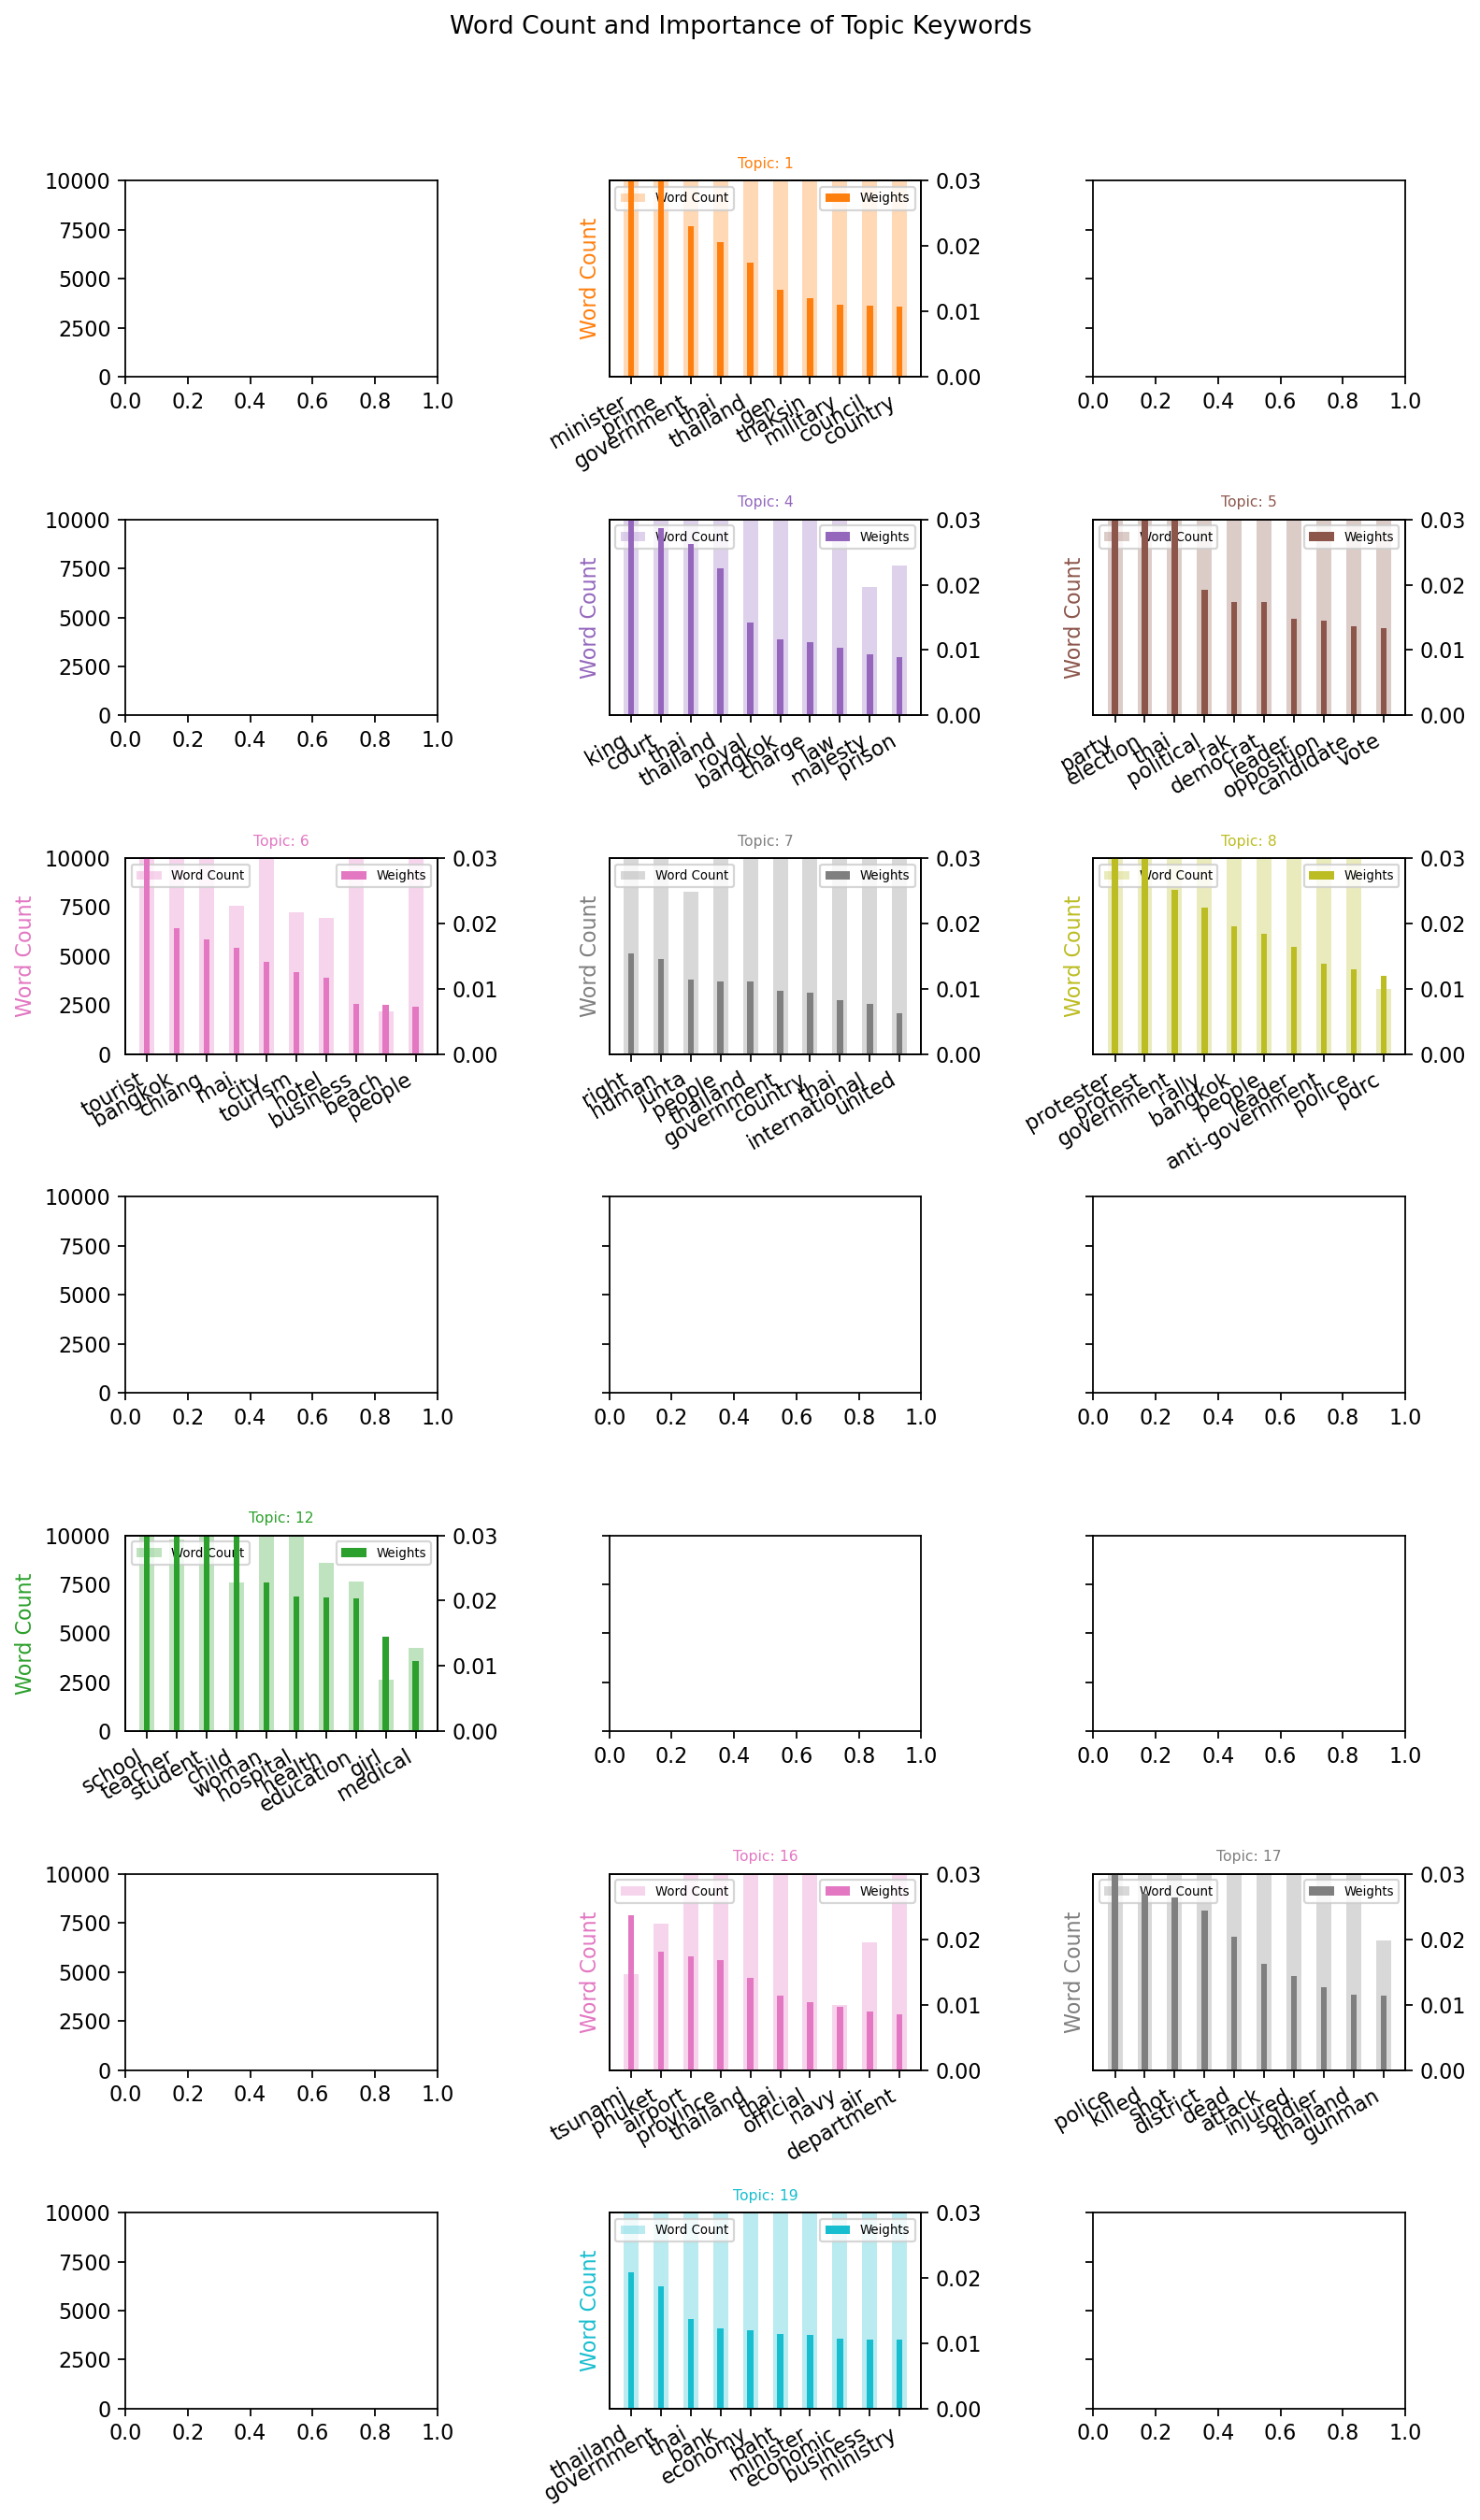

In [156]:

# Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
fig, axes = plt.subplots(7,3,figsize=(10,16), dpi=160, sharey=True)

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    if df.loc[df.topic_id==i, :].empty:
        continue
        # words has problem
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=10)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left',prop={'size': 6}); ax_twin.legend(loc='upper right',prop={'size': 6})
#     except:
#         pass
#     break
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=12, y=1.05)  
fig.savefig("topic-analysis/THA-important-keywords.pdf", bbox_inches='tight', dpi=300,
        transparent=True)
plt.show()

In [130]:
topics
df

,word,topic_id,importance,word_count
0,thailand,10,0.030161,189413
1,south,10,0.028654,35595
2,muslim,10,0.028198,23336
3,southern,10,0.024402,29084
4,violence,10,0.022527,30448
...,...,...,...,...
95,rice,15,0.014453,6009
96,scheme,15,0.013292,5323
97,company,15,0.012755,10138
98,land,15,0.012500,9853


['crime', 'track', 'street', 'crime', 'cybercrime', 'online', 'fraud', 'cybercrime', 'expected', 'grow', 'bangkok', 'metropolitan', 'police', 'target', 'loan', 'shark', 'gang', 'criminal', 'independently', 'street', 'crime', 'rate', 'dropped', 'cyber', 'crime', 'metropolitan', 'police', 'bureau', 'mpb', 'mpb', 'worried', 'internet-based', 'crime', 'rise', 'online', 'fraud', 'rate', 'street', 'crime', 'theft', 'robbery', 'car', 'break-in', 'fallen', 'sharply', 'metropolitan', 'police', 'bureau', 'commissioner', 'pol', 'gen', 'sanit', 'mahathavorn', 'adding', 'stolen', 'car', 'motorcycle', 'bangkok', 'dropped', 'success', 'stepped-up', 'measure', 'mpb', 'increased', 'police', 'patrol', 'told', 'patrol', 'officer', 'talk', 'people', 'community', 'precaution', 'protect', 'crime', 'result', 'street', 'crime', 'downtown', 'cyber', 'crime', 'hand', 'rise', 'continuing', 'trend', 'observed', 'month', 'mpb', 'responsible', 'tackling', 'online', 'crime', 'detective', 'assigned', 'sniff', 'dodgy'

ValueError: too many values to unpack (expected 2)

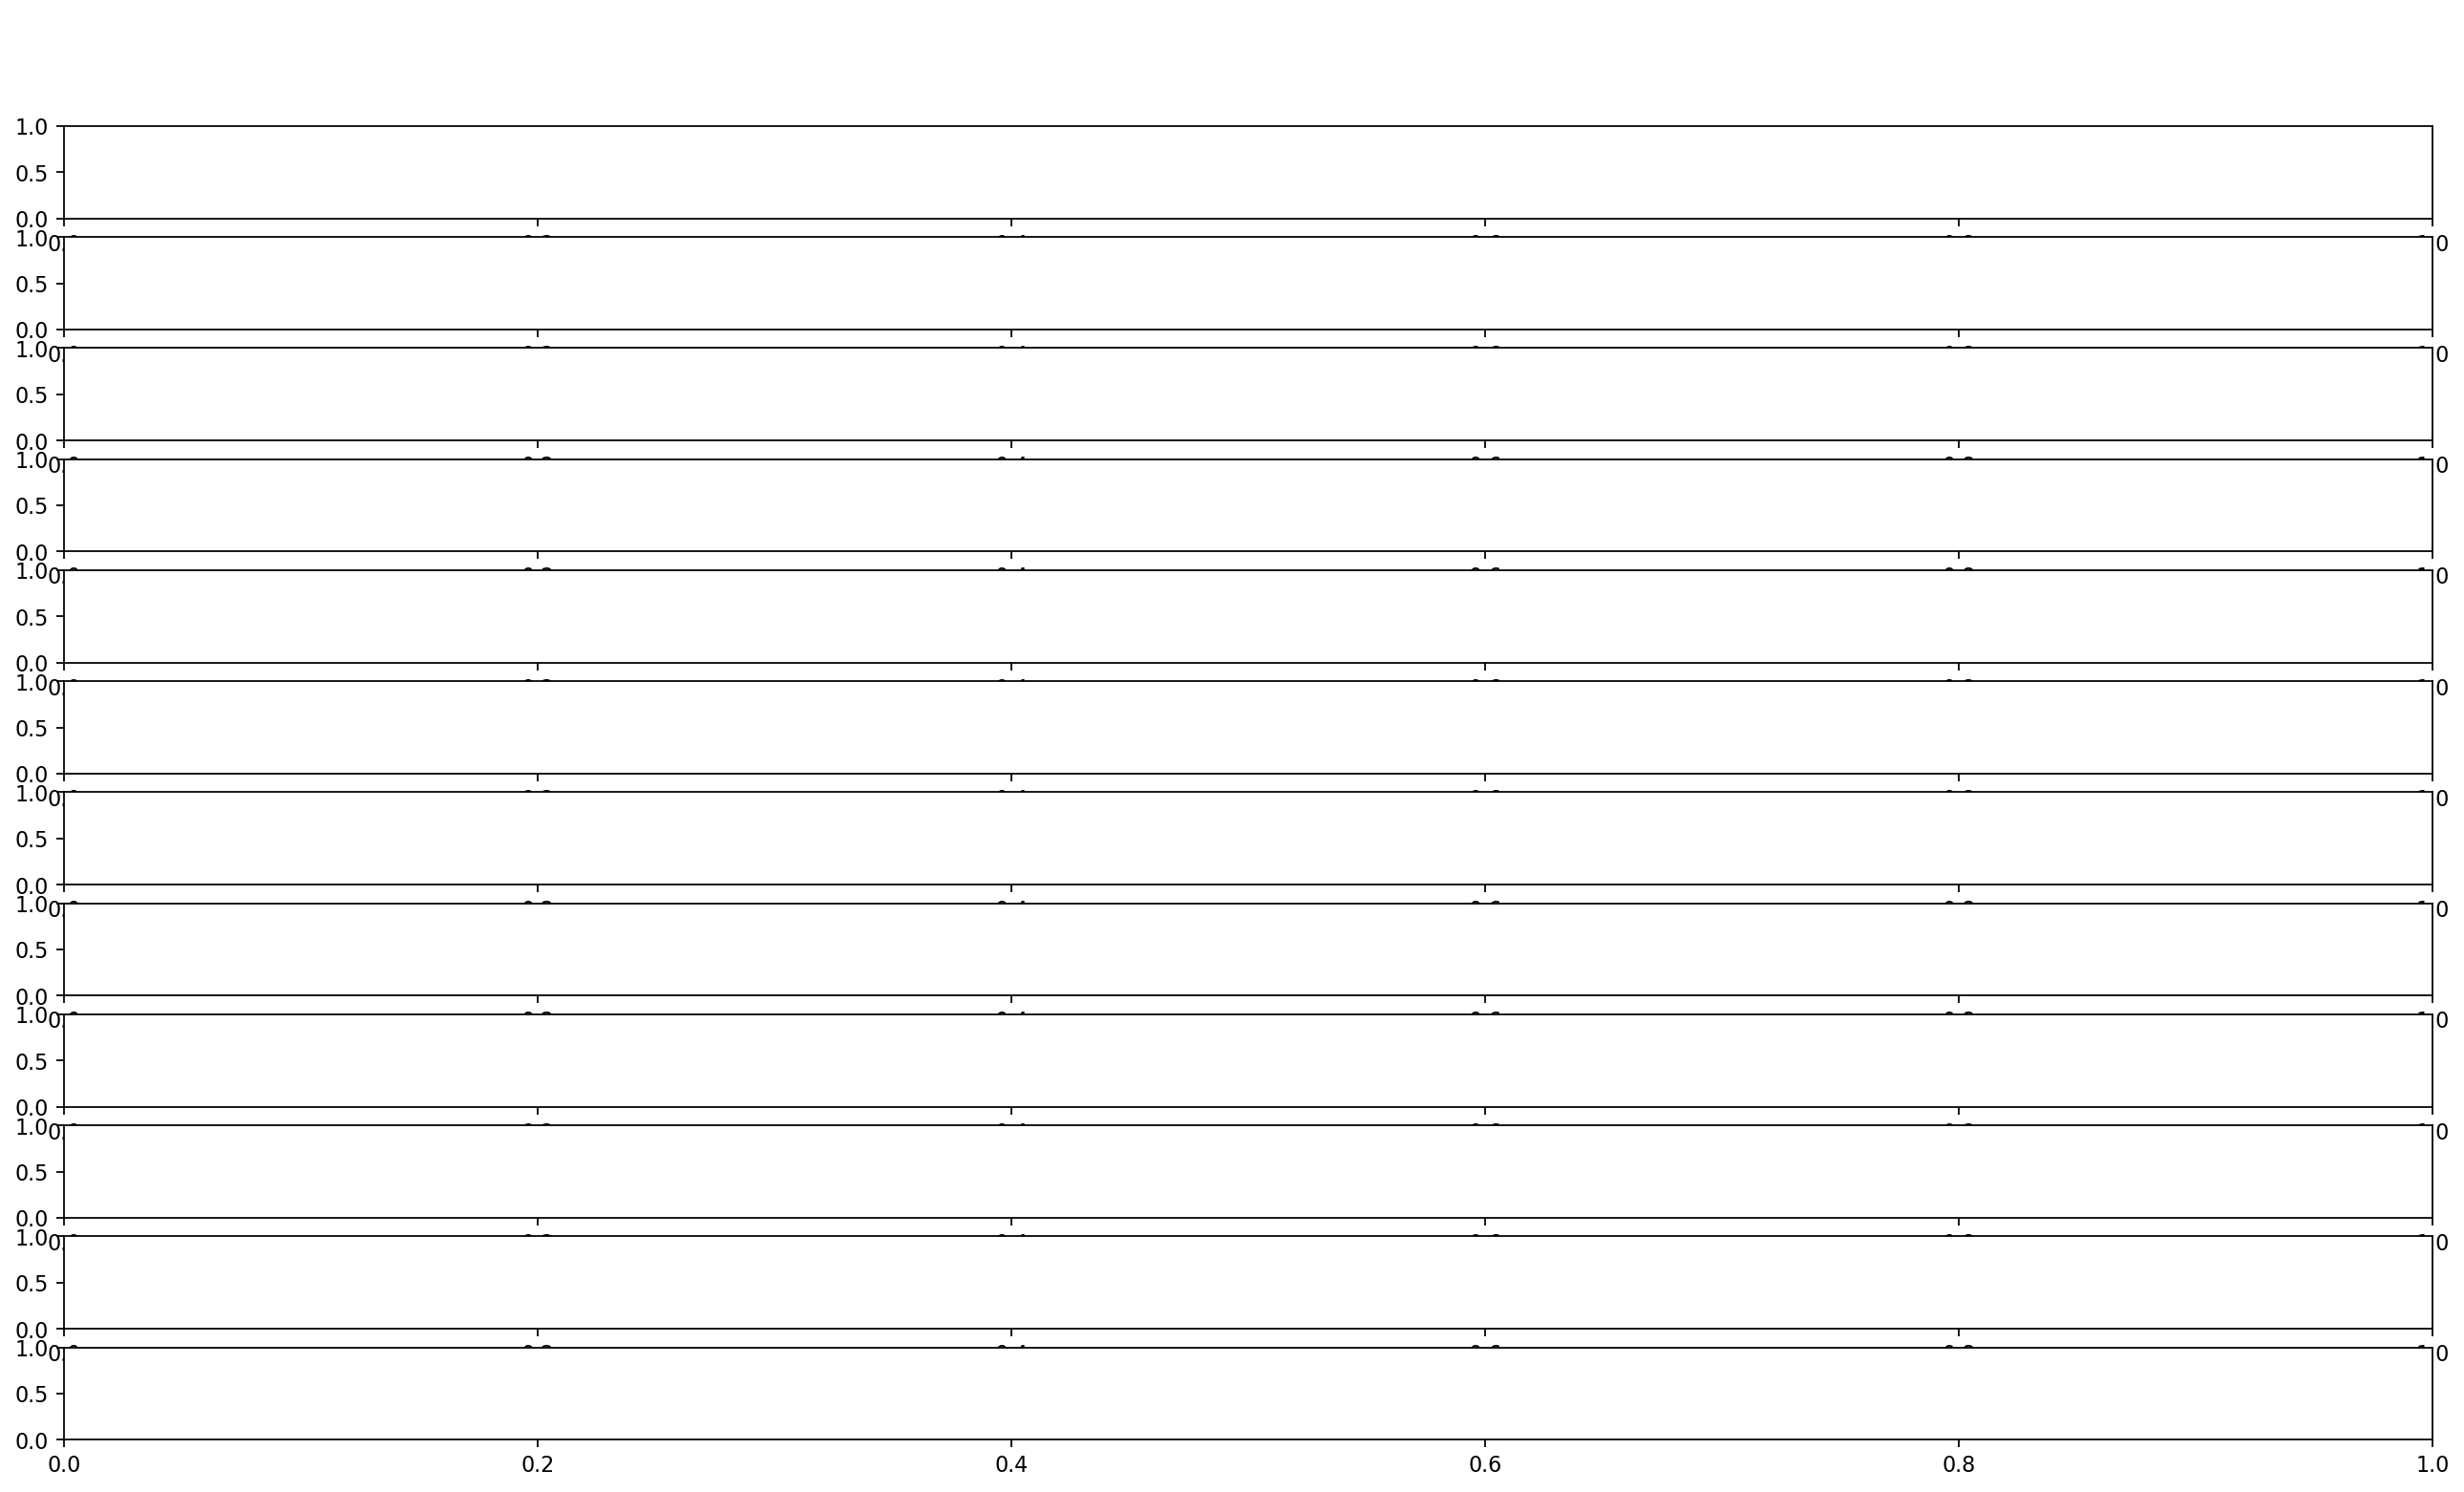

In [161]:
# # Sentence Coloring of N Sentences
# from matplotlib.patches import Rectangle

# def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
#     corp = corpus[start:end]
#     mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
#     mycolors = mycolors + mycolors
#     fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
#     axes[0].axis('off')
#     for i, ax in enumerate(axes):
#         if i > 0:
#             corp_cur = corp[i-1] 
#             print(corp_cur)
#             topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
#             word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
#             ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
#                     fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

#             # Draw Rectange
#             topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
#             ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
#                                    color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

#             word_pos = 0.06
#             for j, (word, topics) in enumerate(word_dominanttopic):
#                 if j < 14:
#                     ax.text(word_pos, 0.5, word,
#                             horizontalalignment='left',
#                             verticalalignment='center',
#                             fontsize=16, color=mycolors[topics],
#                             transform=ax.transAxes, fontweight=700)
#                     word_pos += .009 * len(word)  # to move the word for the next iter
#                     ax.axis('off')
#             ax.text(word_pos, 0.5, '. . .',
#                     horizontalalignment='left',
#                     verticalalignment='center',
#                     fontsize=16, color='black',
#                     transform=ax.transAxes)       

#     plt.subplots_adjust(wspace=0, hspace=0)
#     plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
#     plt.tight_layout()
#     plt.show()

# sentences_chart(lda,corpus_tokenized) 


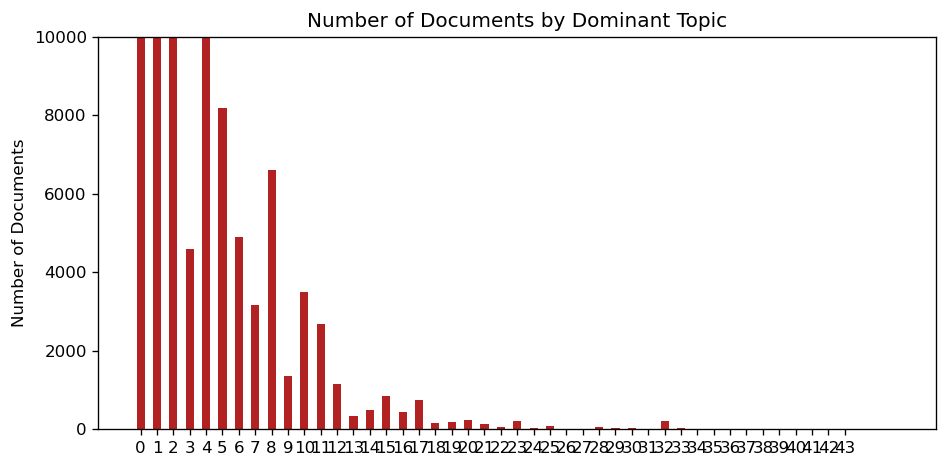

In [252]:
# lda[]
# corpus_tokenized[0]
from matplotlib.ticker import FuncFormatter

# Plot
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='topic', height='count', data=new_df, width=.5, color='firebrick')
ax1.set_xticks(range(df_topic.topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=12))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 10000)

# # # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
fig.tight_layout()    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=12, y=1.05)  
# fig.savefig("topic-analysis/EGY-doc-by-topic.pdf", bbox_inches='tight', dpi=300, transparent=True)
plt.show()


In [171]:
df_topic.topic.unique()

array([ 4,  2,  3,  0, 12,  1,  6,  7, 14,  5, 10,  9, 11, 13,  8, 15, 17,
       16, 19])

In [175]:
df_topic.topic.value_counts()
df2 = df_topic.iloc[:100]

In [250]:

# df2
# df_topic.index.unique().__len__()
tmp = dict(Counter(df_topic.topic))
list(tmp.keys()),tmp.values()

new_df = pd.DataFrame(data = {'topic':list(tmp.keys()),'count':list(tmp.values())})
new_df

,topic,count
0,2,16211
1,1,16413
2,4,12151
3,5,8185
4,0,12377
5,8,6604
6,15,860
7,11,2695
8,6,4891
9,13,349
